In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
bstn = load_boston()
type(bstn)
bstn.keys()
X = pd.DataFrame(bstn['data'], columns=bstn['feature_names'])
y = pd.DataFrame(bstn['target'], columns=['price'])
from sklearn.model_selection import train_test_split
y_train, y_test, X_train, X_test = train_test_split(y, X, test_size=.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
X_train_scld = pd.DataFrame(sclr.fit_transform(X_train), columns=bstn.feature_names)
X_test_scld = pd.DataFrame(sclr.transform(X_test), columns=X_test.columns)

In [60]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_scld_tsne = tsne_model.fit_transform(X_train_scld)
X_train_scld.shape, X_train_scld_tsne.shape, type(X_train_scld), type(X_train_scld_tsne)

((404, 13), (404, 2), pandas.core.frame.DataFrame, numpy.ndarray)

<function matplotlib.pyplot.show(close=None, block=None)>

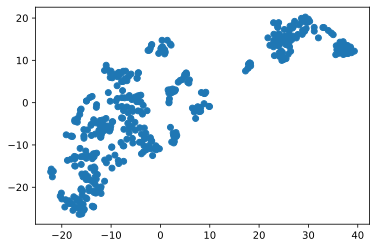

In [57]:
plt.scatter(X_train_scld_tsne[:, 0], X_train_scld_tsne[:,1])
plt.show

In [61]:
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [68]:
X_train_lbls = km_model.fit_predict(X_train_scld)
type(X_train_lbls), X_train_lbls.shape, X_train_scld.shape

(numpy.ndarray, (404,), (404, 13))

In [71]:
cntrs = sclr.inverse_transform(km_model.cluster_centers_)
cntrs.shape

(3, 13)

В результате применения модели KMeans - мы получили координаты 3 точек - центроидов в 13-мерном пространстве признаков исходного набора данных X_train_scld (по количеству признаков); И я не совсем понимаю что дальше с этим делать...

In [77]:
# Вероятно использовать данные из массива X_train_lbls для "разметки" массива на диаграмме:
X_train_scld_tsne.shape

(404, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

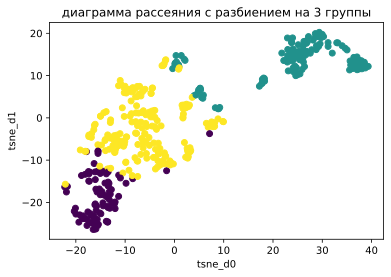

In [85]:
plt.scatter(X_train_scld_tsne[:, 0], X_train_scld_tsne[:, 1], c=X_train_lbls)
plt.xlabel('tsne_d0')
plt.ylabel('tsne_d1')
plt.title('диаграмма рассеяния с разбиением на 3 группы')
plt.show

In [93]:
# Средние значеня по Price
y_train.mean(), \
y_train[X_train_lbls == 0].mean(), \
y_train[X_train_lbls == 1].mean(), \
y_train[X_train_lbls == 2].mean()

(price    22.796535
 dtype: float64,
 price    27.788372
 dtype: float64,
 price    16.165354
 dtype: float64,
 price    24.958115
 dtype: float64)

In [100]:
# Средние значения по 'CRIM'
X_train['CRIM'].mean(), \
X_train[X_train_lbls == 0]['CRIM'].mean(), \
X_train[X_train_lbls == 1]['CRIM'].mean(), \
X_train[X_train_lbls == 2]['CRIM'].mean()

(3.6091246287128715,
 0.07356558139534884,
 10.797028425196851,
 0.4216602094240837)

In [105]:
# Третье задание
X_test_lbls = km_model.predict(X_test_scld)
X_test_lbls.shape

y_test.mean(), \
y_test[X_test_lbls == 0].mean(), \
y_test[X_test_lbls == 1].mean(), \
y_test[X_test_lbls == 2].mean()

(price    21.488235
 dtype: float64,
 price    31.35
 dtype: float64,
 price    16.437143
 dtype: float64,
 price    21.860784
 dtype: float64)

In [106]:
X_test['CRIM'].mean(), \
X_test[X_test_lbls == 0]['CRIM'].mean(), \
X_test[X_test_lbls == 1]['CRIM'].mean(), \
X_test[X_test_lbls == 2]['CRIM'].mean()

(3.630946764705882, 0.06206, 10.165531142857143, 0.2660788235294118)

<function matplotlib.pyplot.show(close=None, block=None)>

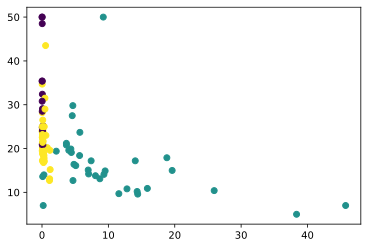

In [107]:
plt.scatter(X_test['CRIM'], y_test, c=X_test_lbls)
plt.show